# Снижение размерности данных

## Мотивация

### Проклятие размерности (The curse of dimensionality)

Одна из ключевых проблем машинного обучения и наук о данных в целом - проблема высокой размерности данных. Мы уже встречали случаи, когда размерность исходных векторов, описывающих объект выборки, могла достигать десятков тысяч, а в перспективе - сотен тысяч и даже миллионов координат. Я говорю о примере векторизации текстов методом TF-IDF (см. [лекцию о линейных классификаторах](https://colab.research.google.com/drive/1xjX_YnXcRr8HSiYLByMHxEIAADqs7QES?usp=share_link)).

Высокая размерность данных накладывает массу негативных эффектов. Иногда совокупность этих эффектов называют **"Проклятием размерности"**, этот термин приписывается Ричарду Беллману. Обсудим некоторые из них, опираясь в частности на примеры, приведенные Кристофером Бишопом в его книге "Pattern Recognition and Machine Learning".

Представим, что мы хотим построить некоторый алгоритм классификации, способный разделить пространство наших признаковых описаний на некие *регулярные ячейки*. Под ***регулярными ячейками*** здесь подразумевается обобщение куба, ребра которого параллельны осям координат, на пространства любых размерностей. То есть в одномерном случае регулярной ячейкой будет отрезок, в двумерном - квадрат, в трехмерном - куб и тд. Каждая ячейка хранит в себе некоторый набор данных, представленный совокупностью точек тренировочного датасета, попавших в эту ячейку, выбор же класса в каждой ячейке происходит при помощи голосования всех объектов, попавших в эту ячейку. Несложно заметить, что описанный алгоритм представляет собой вариацию решающего дерева.

Можно также заметить, что *сложность построения* такого алгоритма и его использования будет расти экспоненциально* с ростом размерности пространства (см. рисунок).

* Под ***сложностью алгоритма*** подразумевается количество базовых арифметических операций (⋅, /, +, -), которые придётся совершить компьютеру для реализации алгоритма

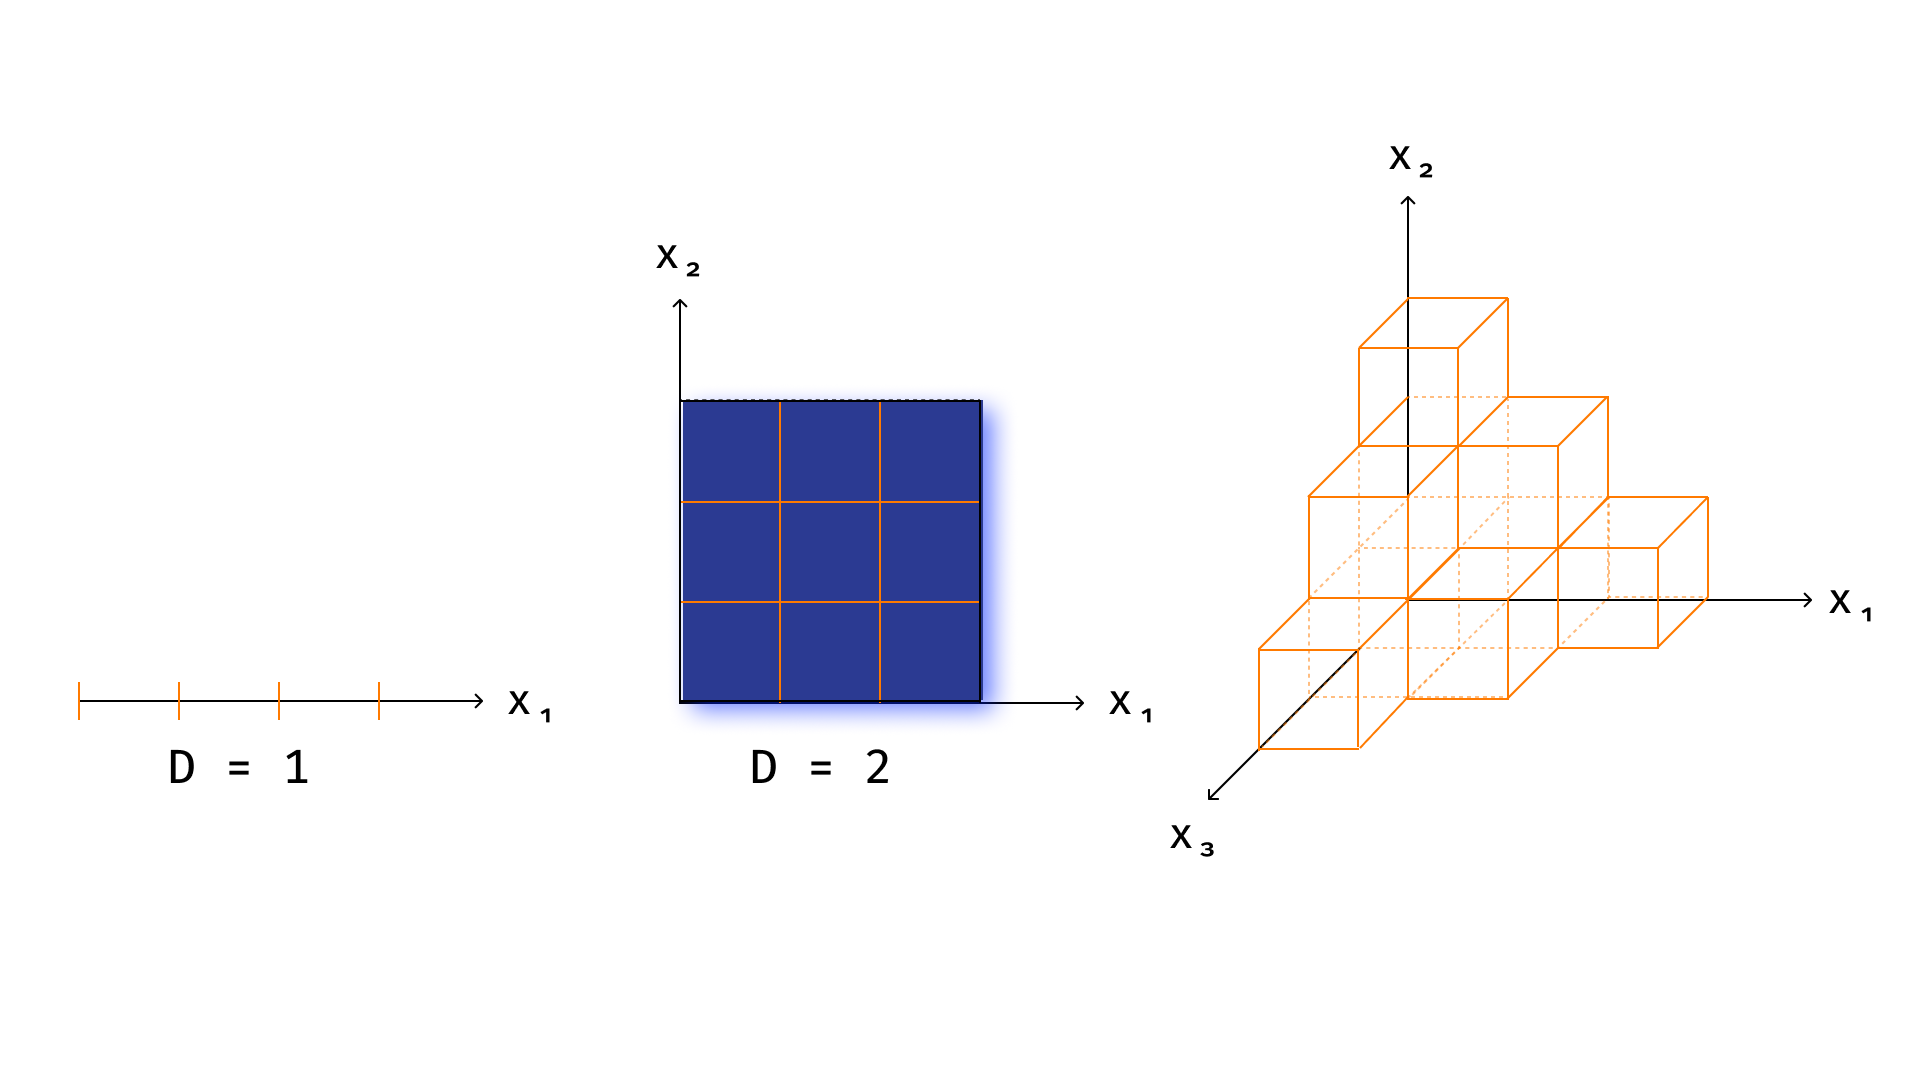

Экспоненциально так же будет расти и сложность любых алгоритмов, основанных на ***методе "применения грубой силы"*** (*brootforce*, так обычно называют алгоритмы, основанные на переборе и подсчете некоторых статистик по всей выборке). Мы не всегда используем в жизни именно такие алгоритмы, однако, во-первых, встречаются они все же довольно часто, а во-вторых, скорость роста сложности других алгоритмов бывает пропорциональна скорости роста сложности brootforce.

Помимо этой проблемы, возникают еще и следующие:

* В случае, когда размерность выборки превышает число объектов в ней, алгоритм неминуемо переобучается. Излишние координаты приводят к переобучению, даже когда размерность ниже, чем мощность выборки.

* Во многих алгоритмах мы прибегаем к понятию *расстояния между объектами*. Лишние координаты влияют на расстояние, но в случае, когда они не несут полезной информации, они представляют собой шум, сбивающий актуальность измеренного расстояния между объектами.


Таким образом, мы приходим к необходимости снижения размерности признакового описания объектов.
То есть наша задача - разработать такую функцию $F$, способную из матрицы $X$ размерности $N \times M$ сделать матрицу $\hat{X}$ размерности $N \times K$, $M>K$ без существенных потерь информации.

Требование несущественности потерь информации можно выразить, например, следующим образом, для преобразования:

$$F: R^{N \times M} \rightarrow R^{N \times K}$$

должно существовать обратное преобразование:

$$F^{-1}: R^{N \times K} \rightarrow R^{N \times M}$$ такое, что $F^{-1}(F(X)) ≈ X$

Сегодня мы рассмотрим популярные способы построения таких преобразований.

# Сингулярное разложение

Сингулярное разложение матрицы, или **Singular Value Decomposition**, кратко SVD - это представление прямоугольной матрицы в виде произведения трех матриц специального вида

$$A = U ΣV^T$$

Матрица $A$ представима в виде произведения следующих матриц:
- $U$ ($UU^{T}=I$, где $I$ — единичная матрица)) — унитарная матрица.
- $V$ ($VV^{T}=I$) — унитарная матрица.
- $\Sigma$ — прямоугольная диагональная матрица, то есть $\Sigma _{{ij}}=0$, если $i \neq j$.

Элементы на диагонали матрицы $\Sigma$ называются *сингулярными числами* и обозначаются $\sigma_i$. ***Сингулярные числа*** - это собственные значения матрицы $AA^T$, они играют важную роль в задачах понижения размерности.

***Унитарная матрица*** (упрощенное определение, подробнее см. [ссылку](https://ru.wikipedia.org/wiki/Унитарная_матрица)) - это  матрица, результат умножения которой на транспонированную матрицу равен единичной матрице.





Давайте посмотрим, как выглядит SVD разложение прямоугольной матрицы $A$.

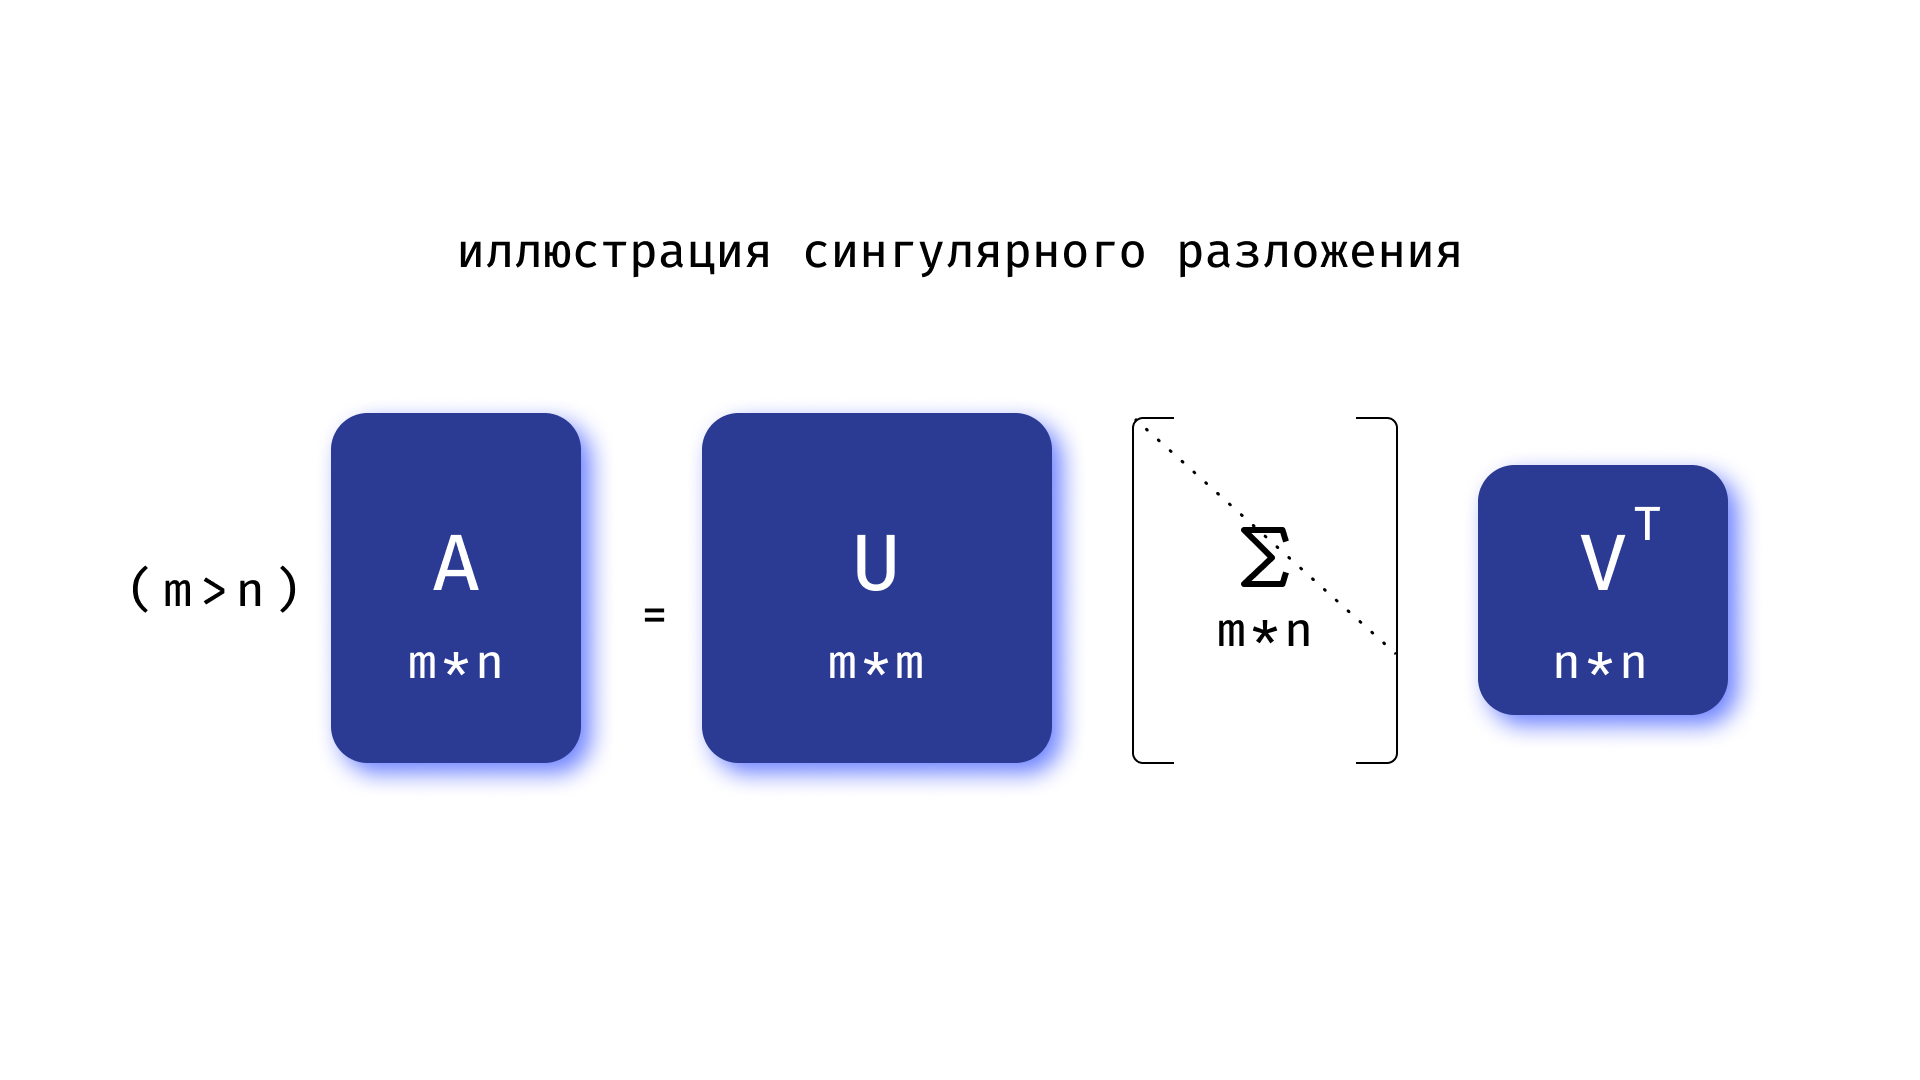

Основное применение SVD разложения:
- фильтрация шума
- выявление линейных зависимостей в данных
- уменьшения размерности

Замечательное свойство сингулярного разложения матриц заключается в том, что оно существует для любой матрицы. Однако, для больших матриц применяют приближенные матричные разложения из-за того, что SVD разложение работает довольно медленно.

Далее мы будем рассматривать только SVD разложение.

Если вы хотите познакомиться с другими методами матричного разложения, а также немного углубиться в вычислительную линейную алгебру, вы можете посмотреть материалы курса ["Математика для анализа данных"](https://teach-in.ru/course/mathematics-for-data-analysis-p1) Ивана Оселедца и Александра Катруцы, которые можно найти на платформе teach-in.

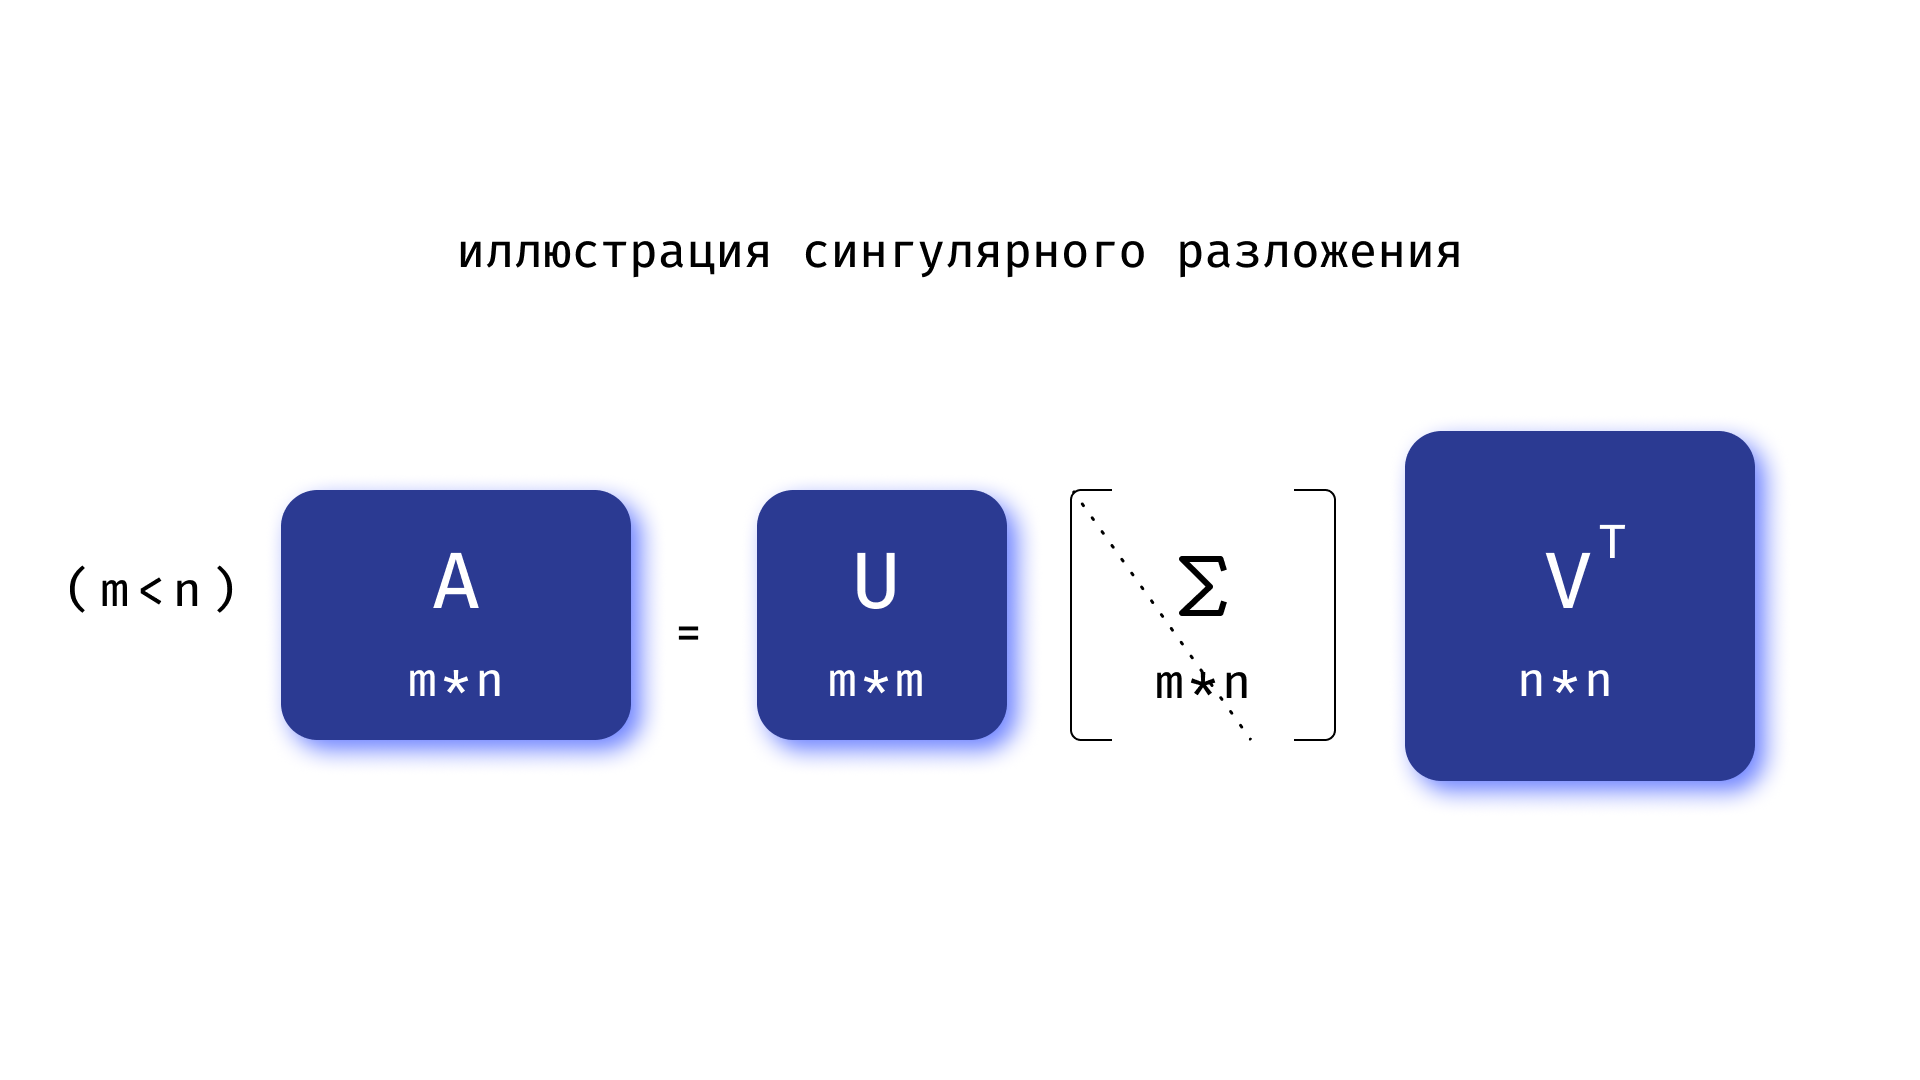

## SVD-преобразование
Сингулярное разложение позволяет из исходной матрицы получить приближенную, взяв только первые $k$ столбцов из соответствующих матриц. Если элементы матрицы $\Sigma$ упорядочены по невозрастанию, то выражение для приближенной матрицы $A_{k}$ выглядит следующим образом:

$$A_{k}=U_{k} \Sigma_{k} V_{k}^{T}$$

где матрицы $U_k$, $\Sigma_{k}$ и $V_{k}$ получаются из соответствующих матриц в сингулярном разложении матрицы A обрезанием до ровно $k$ первых столбцов.

Оказывается, что такое преобразование даёт возможность снизить размерность задачи, потеряв наименьшее количество информации. Выкидывая элементы матриц $U$ и $V$, отвечающие малым сингулярным значениям, мы можем не только не потерять содержательную информацию, но даже избавиться от шума в данных.



## Геометрический смысл SVD*

SVD-разложение матрицы имеет и геометрическую интерпретацию. Эта интерпретация имеет смысл, если мы представляем себе разлагаемую матрицу $A$, как некоторый линейный оператор. Как известно из базового курса аналитической геометрии или линейной алгебры, линейное преобразование координат можно заменить композицией поворотов и растяжений вдоль определённых осей. В случае SVD-разложения операторы $U$ и $V^T$ представляют из себя операторы поворота, в то время как оператор $Σ$ с соответствующей ему диагональной матрицей отвечают, конечно, за растяжение вдоль осей, совпадающих по направлению с собственными векторами матрицы $AA^T$. Коэффициенты растяжения в свою очередь совпадают с сингулярными значениями матрицы оператора $A$. 

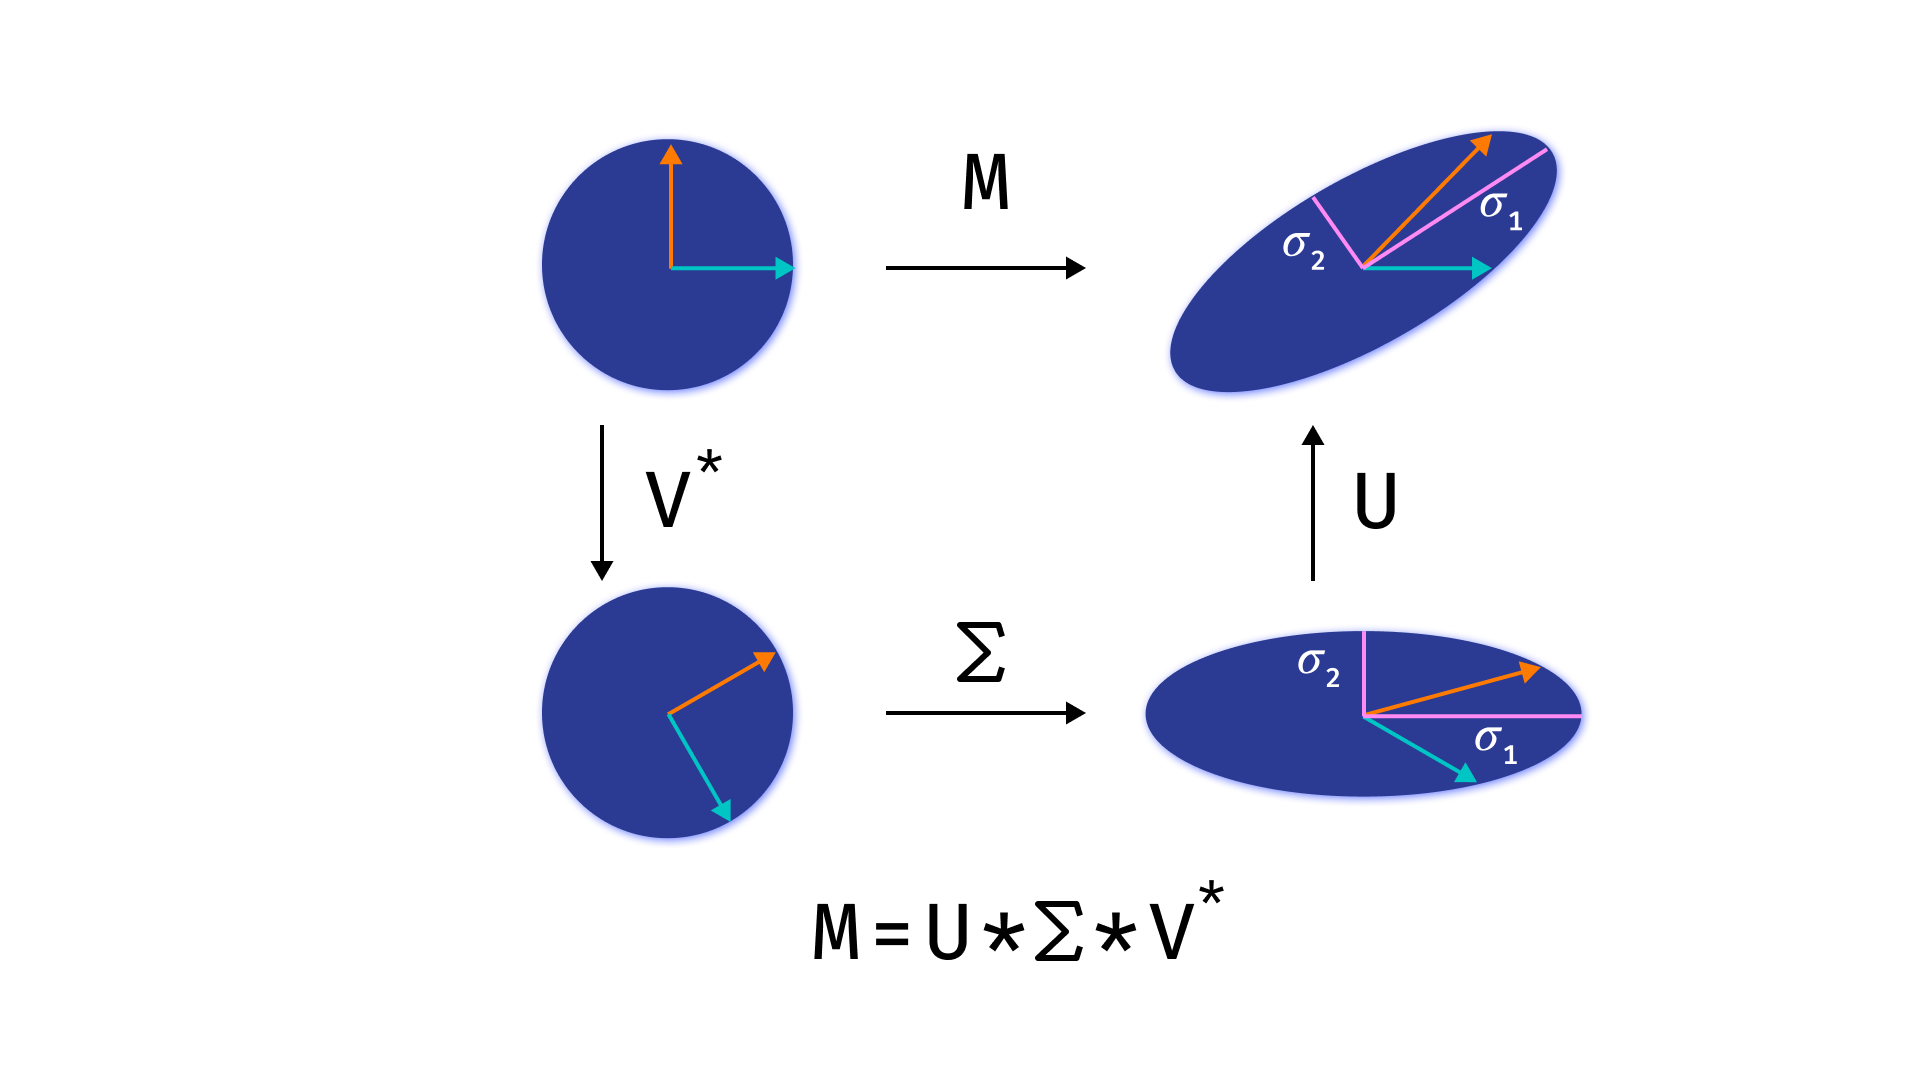

###Замечание

Сам факт соответствия маленьким сингулярным значениям неинформативных координат может быть не вполне очевиден. На этот вопрос можно взглянуть с геометрической точки зрения: как мы выяснили, SVD-разложение представляет разложение по собственным векторам матрицы $AA^T$ с коэффициентами, равными сингулярным значениям. Маленькие сингулярные значения в этом случае сильно занижают отклонение вектора в многомерном пространстве по отношению к соответствующей оси, а значит эта ось может быть отброшена.

С другой стороны, можно подойти к этому вопросу с численной точки зрения: дело в том, что обнуление достаточно малых значений $σ_i$ на диагонали матрицы $Σ$ очень мало повлияют на отличие восстановленной матрицы $A^*$ от исходной $A$. Если считать норму отклонения восстановленной матрицы от исходной $||A^* - A||$ мерой потери информации, то чем меньшие значения $σ_i$ мы обнулим, тем меньше информации мы действительно потеряем.

Подробнее о связи маленьких сингулярных значений с потерей информации можно прочитать, например, [тут](http://www.machinelearning.ru/wiki/index.php?title=Метод_Белсли)

# Примеры применения SVD-разложения

## Cжатие изображений
Одна из самых популярных областей применения SVD-разложения - это сжатие данных. Как мы отметили ранее, SVD-преобразование устроено так, что отбрасывая компоненты, ассоциированные с наименьшими по модулю сингулярными значениями, мы теряем немного существенной информации, а зачастую можем потерять всего-навсего шум, не представляющий для нас особенной ценности. По этой причине мы можем сжимать различные объекты, избегая серьёзного ухудшения качества их представления. Одним из самых репрезентативных примеров такого подхода - это сжатие изображений.

Конечно, изображение само по себе - это объект не математический. Цифровизация изображения позволяет представить его в виде набора пикселей. Такой набор представляет из себя в общем случае набор из нескольких матриц (например, в случае популярной кодировки RGB (Red, Green, Blue) хранится 3 такие матрицы, каждая отвечает своему цвету). Мы же ради простоты рассмотрим случай, когда матрица у нас имеется всего одна. Так бывает, когда изображение, с которым мы работаем, чёрно-белое. Тогда единственный цвет, интенсивность которого мы должны хранить - это серый. То есть чёрно-белое изображение мы можем представить в виде матрицы $A$ интенсивностей серого цвета, к которой в свою очередь мы можем применить SVD-преобразование.

In [ ]:
"""
Технические функции, которые упростят нам процесс работы с google-colab
"""
from IPython.display import display
from google.colab import output

"""
Заранее необходимые модули
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Загрузим изображение розы с Wikipedia
! wget "https://upload.wikimedia.org/wikipedia/commons/d/db/Rosa_Peer_Gynt_1.jpg"
output.clear()

Так как картинка содержит три канала: красный (R), зеленый (G), синий (B), сконвертируем ее в черно-белое изображение, чтобы получить матрицу.

Для ээтого воспользуемся функцией `.convert()` довольно известной библиотеки *Python Image Library (PIL)*, предназначенной специально для работы с графическими данными в Python.

In [ ]:
from PIL import Image
get_ipython().__class__.__name__ = "ZMQInteractiveShell"

filename = "Rosa_Peer_Gynt_1.jpg"
img = Image.open(filename).convert('L')
print(img.size)

(1600, 1503)


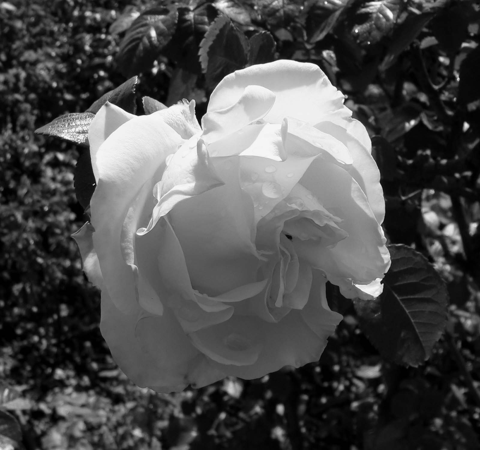

In [ ]:
scale = 0.3
display(img.resize((int(img.width * scale), int(img.height * scale))))

In [ ]:
img_array = np.asarray(img)
img_array.shape

(1503, 1600)

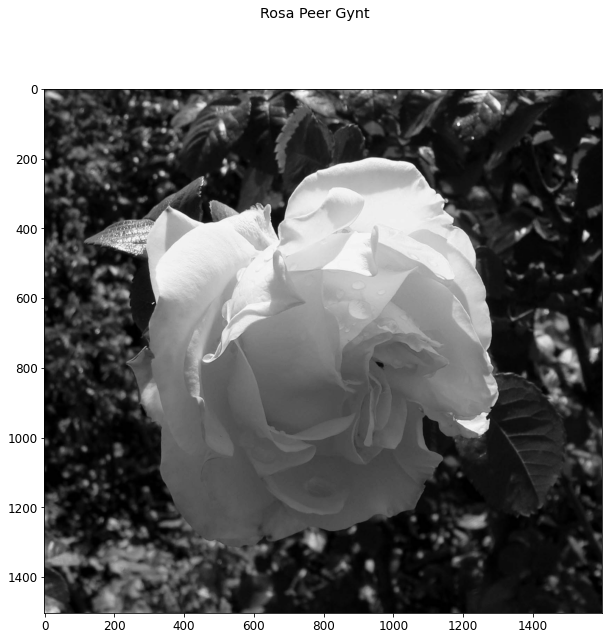

In [ ]:
plt.rcParams['font.size'] = 12
fg_color = 'black'
bg_color = 'white'

fig = plt.figure(figsize=(10, 10))
fig.set_facecolor(bg_color)
im = plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)
fig.suptitle('Rosa Peer Gynt', color=fg_color)
im.axes.tick_params(color=fg_color, labelcolor=fg_color)

Итак, мы разобрались с тем, как представлено изображение в виде массива. На текущий момент изображение хранится в переменной `img_array`. Самое время понять, как сделать SVD-преобразование.

In [ ]:
def svd_transformation(A, n_comps):
  # SVD-разложение можно провести, воспользовавшись функцией модуля np.linalg.svd()
  U, D, V = np.linalg.svd(A)
  # По определению svd-преобразования, обрежем соответствующие матрицы
  U_cuted = U[:, :n_comps]
  D_cuted = np.diag(D[:n_comps])
  V_cuted = V[:n_comps, :]

  # Затем выполним их матричное умножение
  transformed = U_cuted.dot(D_cuted).dot(V_cuted)
  return transformed

Теперь попробуем получить изображения при помощи сжатия размерности исходной матрицы до 50, 100, 150 и 200 компонент.

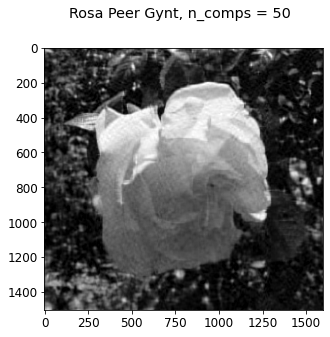

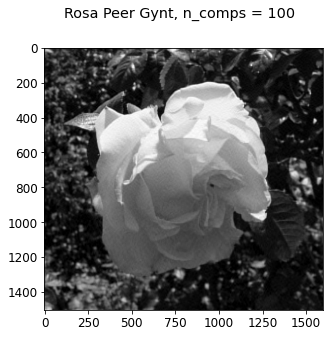

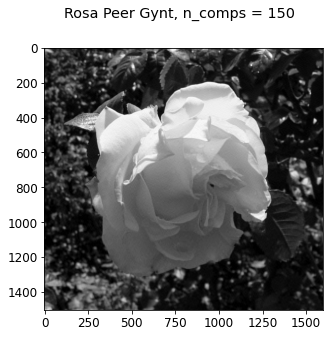

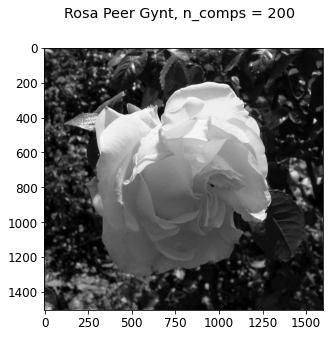

In [ ]:
for n_comps in [50, 100, 150, 200]:
    # SVD-преобразование
    reconst_img = svd_transformation(img_array, n_comps)

    # Отрисовка результата
    fig = plt.figure(figsize=(5, 5))
    im = plt.imshow(reconst_img, cmap='gray', vmin=0, vmax=255)
    fig.suptitle(f'Rosa Peer Gynt, n_comps = {n_comps}', color=fg_color)
    fig.set_facecolor(bg_color)
    im.axes.tick_params(color=fg_color, labelcolor=fg_color)    

Несложно заметить очевидную тенденцию: качество изображения растёт с увеличением числа компонент. Однако даже при крайне низком числе компонент `n_comp = 50` изображение, полученное при помощи сжатия исходного, вполне читаемое, хотя и не слишком отчетливое.

## Анализ текстов

Рассмотрим также модельный пример анализа текста статьей. Рассмотрим 4 статьи на 4 различные темы. Пусть про каждую статью известно, какие слова в ней употребляются.

Нам даны 4 темы:
* Сноуборд
* Хоккей
* Фигурное катание
* Плавание

Соответственно есть набор слов, встречающихся в этих статьях: 'снег', 'гора', 'лёд', 'шайба', 'опасность'.

Составим таблицу, в которой каждой колонке будет отвечать определённая статья, а каждой строке - слово. Элемент с индексами i, j этой таблице $a_{ij}$ представляет из себя количество появлений слова $i$ в статье $j$. Это один из достаточно стандартных способов описания корпуса текстов.


*Замечание: мы не используем здесь примеры настоящих статей, поскольку результат получится не столь репрезентативным, для нас же важно показать идею метода.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# статья 1 - о сноуборде
# статья 2 - о хоккее
# статья 3 - о фигурном катании
# статья 4 - о плавании

c_names = ['статья_1', 'статья_2', 'статья_3', 'статья_4']
words = ['снег', 'гора', 'лёд', 'шайба', 'опасность']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]], index = words, columns = c_names)
post_words.index.names = ['word']
post_words

,статья_1,статья_2,статья_3,статья_4
word,,,,
снег,4,4,6,2
гора,6,1,0,5
лёд,3,0,0,5
шайба,0,6,5,1
опасность,0,4,5,0


Матрицы $U$ и $V$ сингулярного разложения в каком-то смысле можно рассматривать как векторные представления исходных текстов. Например, текущая матрица $V$ даёт довольно чёткие представления о схожести статей ё и 4.

In [ ]:
U, D, V = np.linalg.svd(post_words)
V_df = pd.DataFrame(V, columns=c_names)
V_df

,статья_1,статья_2,статья_3,статья_4
0,-0.395634,-0.570869,-0.630100,-0.347212
1,-0.599836,0.331743,0.408279,-0.602870
2,0.604001,-0.405353,0.321932,-0.605996
3,-0.344752,-0.632253,0.576751,0.385695


При анализе информативности компонент разложения (а под компонентами мы подразумеваем по сути координаты признакового описания после преобразования) мы можем опереться на соответствующие им сингулярные значения. Чем больше сингулярное значение $σ_i$, тем более информативна компонента. Часто пользуются следующим критерием:

Рассмотрим соотношение $$E_m = \frac{∑\limits_{i=1}^mσ_i}{∑\limits_{j=1}^Nσ_j}$$
Где N - число компонент всего.
В случае, если $E_m$ - достаточно большое, мы можем отбросить все последующие компоненты, поскольку даже взятых $m$ штук хватает для исчерпывающего описания данных.

Заметим, что в нашем случае первые две компоненты несут основную информацию, остальные несут незначительную информацию, которую можно отбросить.

*Замечание: иногда рассматривается альтернативная величина $E_m = \frac{∑\limits_{i=m}^Nσ_i}{∑\limits_{j=1}^Nσ_j}$. В этом случае резкое снижение $E_m$ при росте $m$ будет служить сигналом о неинформативности последующих компонент. Тогда их можно отбросить. Такой критерий часто называют критерием крутого склона.

In [ ]:
D

array([13.3221948 ,  9.2609512 ,  2.41918664,  1.37892883])

In [ ]:
E2 = np.sum(D[:2]) / np.sum(D)
E2

0.8560298007265911

Найдем приближенную матрицу $A$, используя только первые $2$ столбца каждой матрицы в SVD разложении.

In [ ]:
n_approx = 2
A_approx = svd_transformation(post_words, n_approx)#np.matrix(U[:, :n_approx]) * np.diag(sigma[:n_approx]) * np.matrix(V[:n_approx, :])

pd.DataFrame(A_approx, index=words, columns=c_names)

,статья_1,статья_2,статья_3,статья_4
снег,3.197084,4.818556,5.325736,2.792675
гора,5.619793,0.588201,0.384675,5.412204
лёд,4.043943,0.071665,-0.123639,3.917015
шайба,0.682117,5.089628,5.762122,0.336491
опасность,0.129398,4.219523,4.799185,-0.143946


Оценим ошибку относительно исходной матрицы $A$

In [ ]:
(post_words - A_approx)/post_words

,статья_1,статья_2,статья_3,статья_4
word,,,,
снег,0.200729,-0.204639,0.112377,-0.396337
гора,0.063368,0.411799,-inf,-0.082441
лёд,-0.347981,-inf,inf,0.216597
шайба,-inf,0.151729,-0.152424,0.663509
опасность,-inf,-0.054881,0.040163,inf


По значениям матрицы $V$ можно даже сделать определённые выводы о принадлежности текстов темам.

Для наглядности визуализируем числа и посмотрим на строки

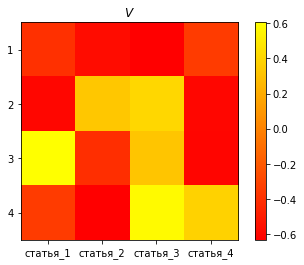

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.imshow(V, cmap='autumn');
plt.colorbar();

Видно, насколько разные темы в зависимости от количества вхождений различных слов

In [ ]:
pd.DataFrame(U[:,1], index=words)

,0
снег,0.018526
гора,-0.678291
лёд,-0.519801
шайба,0.370263
опасность,0.363717


## Применение в рекомендательных системах*

Матричные разложения широко применяются в рекомендательных системах. Конечно, сейчас разработаны более сложные алгоритмы, многие из которых основанные на нейронных сетях.

Однако, старая добрая "классика" тоже иногда применяется на практике, например, в алгоритмах рекомендации видео на Youtube, Kinopoisk, Netflix.

Одним из самых известных датасетов для оценки рекомендательных алгоритмов является [MovieLens](https://grouplens.org/datasets/movielens/).

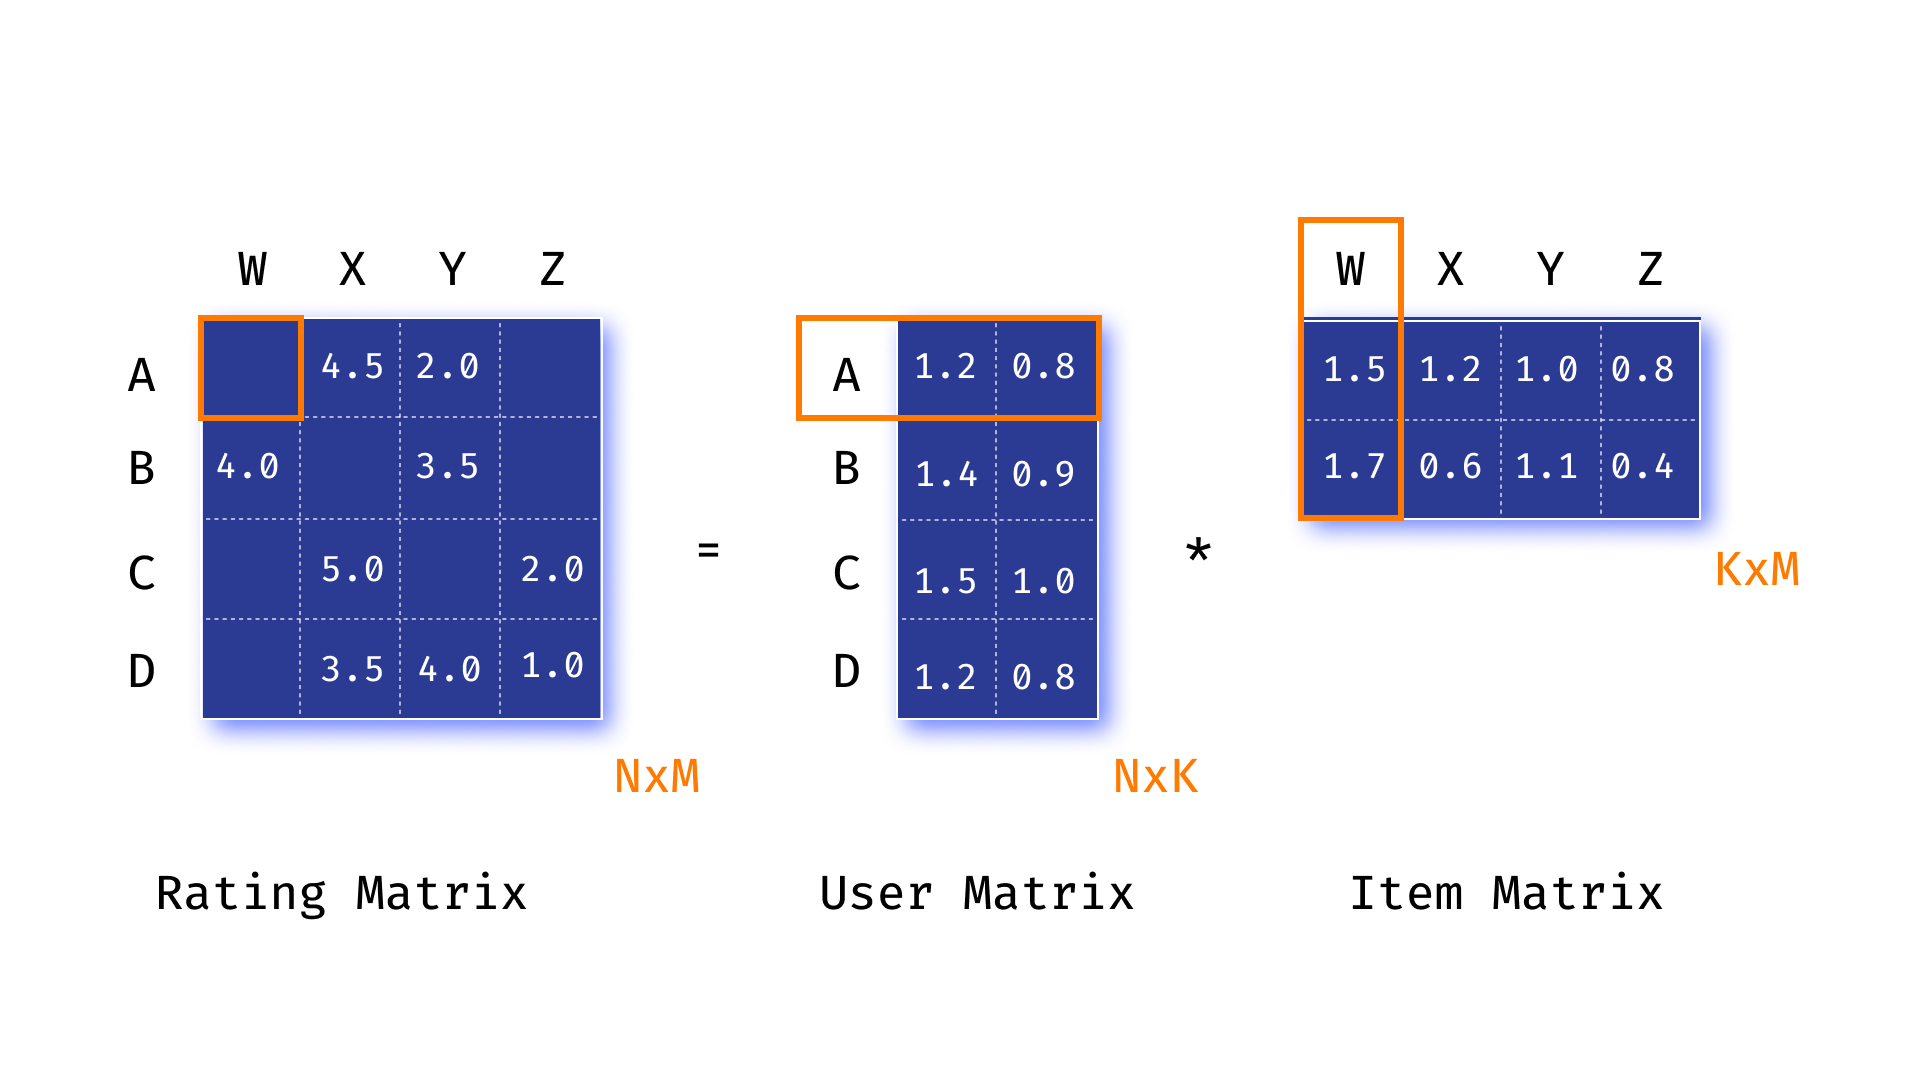

Подробно про рекомендательные системы вам расскажут в одной из будущих лекций.

В данном случае будет искать приближенную матрицу $A^*$ в виде произведения двух матриц $U'$ и $V'$:
$$A^* \sim U' V'^{T}$$

Погрешность SVD разложения будем оценивать следующим образом:
$$ e_{i,j} = A_{i,j} - A^*_{i,j} $$

Минимизируем следующую сумму квадратов, используя известные значения матрицы. Добавим к ошибке дополнительные слагаемые, умноженные на $\gamma$ - такой подход называется регуляризацией. Он применяется, когда необходимо задать определенные свойства решения, которое мы хотим найти:
$$ min(\sum_{i,j} ({e_{i,j}})^2 + \gamma ( \sum_{i,j} ({u_{i,j}})^2 + \sum_{i,j} ({v_{i,j}})^2 ))$$

Без регуляризации может быть взрывной рост у значений $u_{i,j}$ и $v_{i,j}$.

Для поиск значений матрицы $U'$ и $V'$ применяется итеративный алгоритм - метод градиентного спуска.


# Метод главных компонент

Метод главных компонент (Principal component analysis, PCA) – один из основных методов сокращения размерности данных, используемых в машинном обучении. Сокращение размерности применяется для того, чтобы найти наиболее важные признаки в альтернативном признаковом пространстве.

Метод главных компонент был предложен в 1901 году Карлом Пирсоном. Карл Пирсон - один из наиболее известных ученых, занимавшихся математической статистикой. Широко известен предложенный им способ количественного измерения статистической взаимосвязи двух или более случайных величин - коэффициент корреляции Пирсона, или просто коэффициент корреляции.

PCA по своей сути представляет unsupervised-алгоритм, то есть не требует никакой предварительной разметки данных.

PCA применяется не только для снижения размерности данных, но и для визуализации данных, фильтрации шума, выделение главных признаков, генерация новых признаков.

Но в данной лекции мы рассмотрим случай снижения размерности.
В рамках PCA мы работаем с довольно интуитивным предположением о том, что информативность некоторого подпространства в пространстве признакового описания объектов описывается дисперсией проекции данных на это подпространство.


Метод главных компонент находит такую проекцию данных на пространство меньшей размерности, которая максимально сохраняет дисперсию данных.

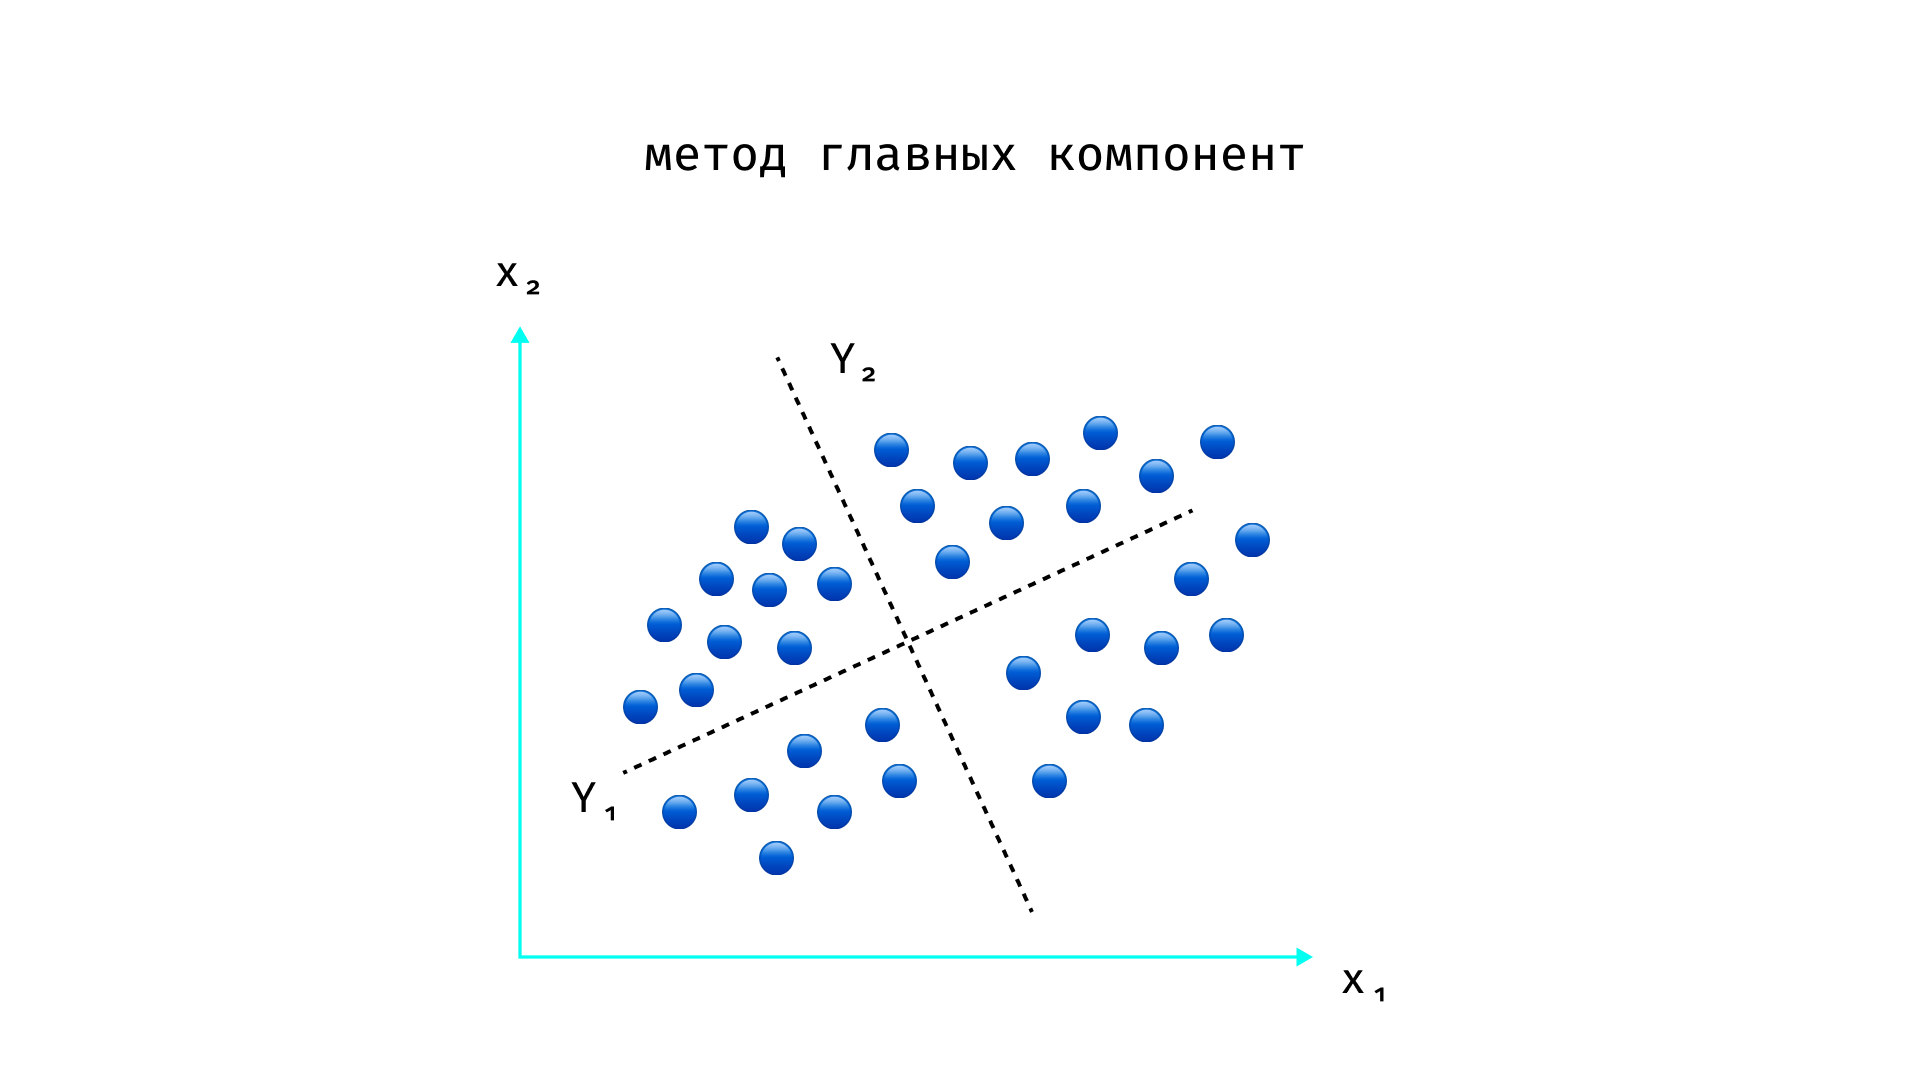

Для лучшего понимания PCA представим себе такую ситуацию:

Пусть фактор $X_1$ описывает максимальную скорость автомобиля, а фактор $X_2$ - объем его двигателя. Некоторое агенство провело исследование и заметило 2 следующие закономерности:

* Никто не производит автомобили с большим объемом двигателя и маленькой максимальной скоростью, или же наоборот. Обычно объем двигателя коррелирует с максимальной скоростью.

* Предыдущий вывод объясняется тем, что дорогие машины имеют лучшие характеристики по обоим факторам, а дешевые - худшие также по обоим. Бывают небольшие отклонения от этой закономерности, но они по большей части статистически незначимы

Описанная ситуация проиллюстрирована на рисунке выше.

Теперь представим, что мы составляем модель для предсказания стоимости автомобиля на основании этих двух факторов. Есть ли для нас необходимость рассматривать ооба эти фактора, чтобы сделать вывод о стоимости автомобиля?

Оказывается, мы можем обойтись всего одним признаком. Например, нам о многом скажет уже сумма $X_1$ + $X_2$, поскольку у дорогих машин она окажется большой, а у дешевых - маленькой. А вот признак $X_1 - X_2$ окажется совершенно не информативным, ведь и для дорогих машин, и для дешевых это значение будет низким в силу первого наблюдения.

То есть от признаков $X_1$ и $X_2$ мы перешли к признакам $Y_1 = X_1 + X_2$ и $Y_2 = X_1 - X_2$, среди которых нам интересен только признак $X_1$. Почему он нам интересен? Потому что вдоль оси $Y_1$ будет большой разброс значений, ведь в нашей выборке есть и дешевые автомобили, для которых $Y_1$ маленький, и дорогие, для которых $Y_1$ большой. Чего не скажешь про $Y_2$, который мал для обоих типов автомобилей, а также для любых промежуточных и почти не несёт информации. Геометрически это преобразование означает поворот оей координат в исходном пространстве, примерно как показано на рисунке. Именно это и делает PCA - находит преобразование, позволяющее оценить информативность каждого нового признака засчёт разброса значений вдоль новых осей координат. 

## Демонстрация PCA

Первым делом сформмируем синтетическую выборку, на которой можно продемонстрировать работу PCA.

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

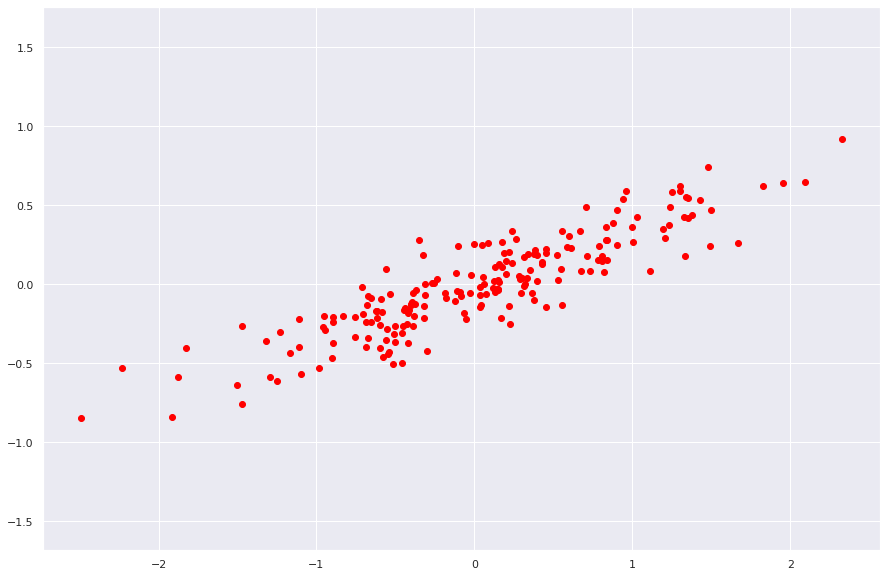

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

rst = np.random.RandomState(1)
plt.figure(figsize=(15,10))
X = np.dot(rst.rand(2, 2), rst.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], color="red")
plt.axis('equal')

Алгоритм PCA реализован в библиотеке `sklearn` в модуле `decomposition`.

В качестве аргумента PCA ожидает `n_components` - число компонент, которые мы хотим оставить, то есть размерность пространства, в которое мы переходим.

PCA - это алгоритм преобразования данных, поэтому для его использования можно воспользоваться стандартным синтаксисом `sklearn` для transformers, то есть вызывать функции `.fit()` и `.transform()`

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Посмотрим, как выглядят главные компоненты, обратившись к следующим атрибутам `PCA`:
- `components` - векторы, отвечающие новой системе координат
- `explained_variance` - длины векторов, соответствующие дисперсии выбрки вдоль данного направления

In [ ]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


Визуализируем этот результат

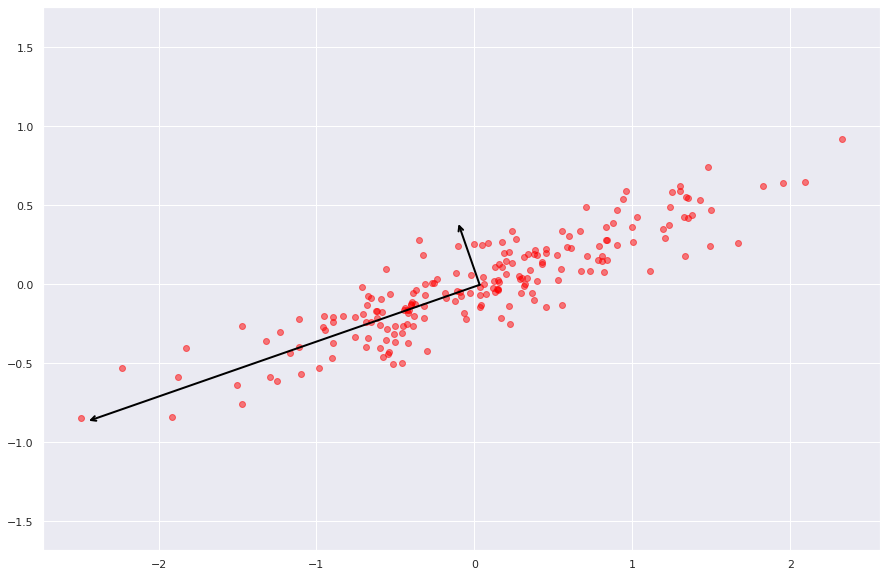

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, 
                    shrinkB=0, 
                    color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)


plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color="red")
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Полученные векторы представляют главные "оси" в данных, а длина вектора указывает на то, насколько "важна" эта ось для описания распределения данных. Точнее, это мера дисперсии (разброса) данных при проецировании на эту ось.

Проекция каждой точки данных на главные оси является "главными компонентами" данных, отсюда и название метод главных компонент.



Далее мы на примере увидим, как можно применять PCA для снижения размерности в данных.

## Применение PCA для снижения размерности многомерных данных

Как вам кажется, сильно ли упадет качество классификации, если мы снизим размерность признакового описания радикально, то есть, скажем, с нескольких десятков тысяч до, скажем, десяти?

Ответ на этот вопрос неоднозначен, в случае разных задач, разных алгоритмов, разных датасетов все будет по-разному. 

Однако давайте убедимся, что в каких-то случаях такое сильное снижение размерности не приведет к абсолютной несостоятельности алгоритма.

Для примера возьмем уже известный нам датасет с новостными статьями из sklearn.

In [ ]:
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X.shape

(1786, 28382)

Как мы видим, в датасете содержится около 30 000 признаков. Давайте сожмем их, скажем, до 10.

In [ ]:
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import accuracy_score

n_comp = 5
pca = PCA(n_components=n_comp)
X_tr = pca.fit_transform(X_train.toarray())
x_te = pca.transform(x_test.toarray())

clf = xgb.XGBClassifier().fit(X_tr, y_train)

In [ ]:
clf.score(X_tr, y_train)

0.984

In [ ]:
acc = accuracy_score(clf.predict(x_te), y_test)
acc

0.9664179104477612

А что будет, если обучить классификатор на полной выборке?

In [ ]:
clf_full = xgb.XGBClassifier().fit(X_train, y_train)

In [ ]:
acc = accuracy_score(clf_full.predict(x_test), y_test)
acc

0.9776119402985075

Разница в качестве составляет всего-навсего 6%.

Нельзя сказать, что это отличие незаметно, но учитывая, что размерность пространства была снижена в 3000 раз, пожалуй, этот результат впечатляет.

## PCA для иллюстрации семантической близости слов


Мы уже встречали один из методов векторизации текстов, который назывался tf-idf. Это хороший метод, который тем не менее обладает своими недостатками. Они состоят, во-первых, в высокой размерности получившихся векторов, а во-вторых, в том, что такие векторы не учитывают семантические связи между словами. То есть мы не сможем, например, отличить синонимичные слова от слов, которые никак друг с другом не связаны, по сформированным векторам. Для борьбы со второй проблемой используется подход, основанный на лингвистической гипотезе:

"You shall know a word by the company it keeps"  (c)J.R.Firth, 1957

Смысл этой идеи состоит в том, что семантически связанные друг с другом слова часто фигурируют в одних и тех же контекстах, то есть появляются в "компании" одних и тех же слов.

На основе этой идеи предложим следующий подход векторизации слов или, говоря в терминах NLP, составления **эмбеддингов**:

1) Считаем, как часто каждая пара слов встречается в одном и том же предложении. Получаем матрицу соседств или coocurance matrix

2) Преобразуем эту матрицу к меньшей размерности при помощи PCA

In [ ]:
texts = ['Mars has an atmosphere', "Saturn 's  moon Titan has its own atmosphere", "Mars has two moons", "Saturn has many moons", "Io has cryo-vulcanoes"]

Напишем функцию составления coocurance matrix

In [ ]:
import numpy as np
def make_cooccurrence_matrix(teexts):
  # Зададим словарь и попарную частоту совместной встречаемости слов
  vocabulary = set(texts[0].split())
  for t in texts[1:]:
    vocabulary = vocabulary.union(set(t.split()))
  vocabulary=list(vocabulary)

  N = len(vocabulary)
  
  # Задаём cooccurrence matrix
  cooccurrence = np.zeros((N,N))
  for i in range(N):
    for j in range(i, N):
      if i == j:
        continue
      for t in texts:
        if vocabulary[i] in t.split() and vocabulary[j] in t.split():
          cooccurrence[i][j]+=1
          cooccurrence[j][i]+=1
  return cooccurrence, vocabulary

In [ ]:
c, v = make_cooccurrence_matrix(texts)

Посмотрим на словарь и получившуюся матрицу.

In [ ]:
v

['moon',
 'own',
 'many',
 'an',
 'Titan',
 'Mars',
 'two',
 'cryo-vulcanoes',
 'has',
 'Saturn',
 'atmosphere',
 'moons',
 "'s",
 'Io',
 'its']

In [ ]:
c

array([[0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 2., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [1., 1., 1., 1., 1., 2., 1., 1., 0., 2., 2., 2., 1., 1., 1.],
       [1., 1., 1., 0., 1., 0., 0., 0., 2., 0., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 1., 1., 0., 0., 2., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 2., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0.

Зададим PCA с n_components = 2, чтобы изобразить результат на двумерной плоскости

In [ ]:
from sklearn.decomposition import PCA
p = PCA(n_components=2)
pca = p.fit_transform(c)

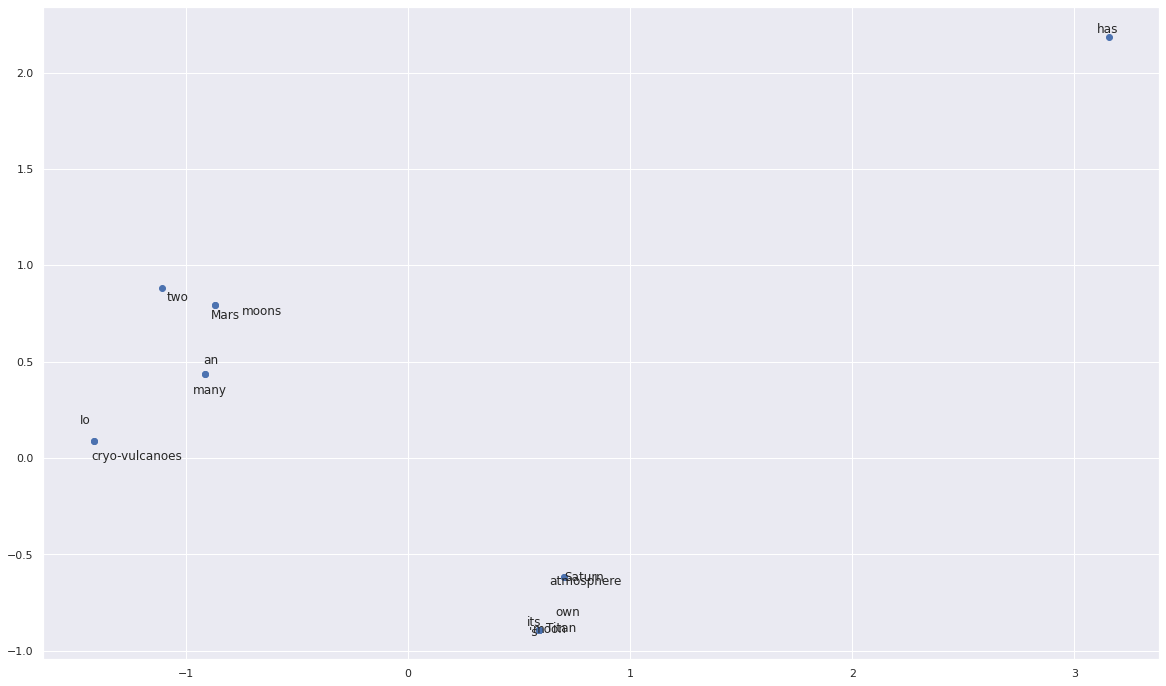

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20,12))
ax = plt.gca()
for i,c in enumerate(pca):
    ax.annotate(s = v[i], xy = (c[0] + np.random.randn()/15, c[1]+ np.random.randn()/15))
plt.scatter(pca[:,0], pca[:,1])

Как мы видим, многие выражения, которые присутствовали в одних контекстах исходных текстов, после преобразования превратились в близкие точки.

Например, слова "Io" и "Cryo-vulcanoes" почти совпадают на координатной плоскости, также как и "Mars", "two" и "moons", а также "Saturn", "Titan", "moon" и "atmosphere". По сути, наши исходные предложения были разбиты на некоторое подобие кластеров.

# t-SNE

Данный алгоритм понижает размерность многомерных данных, сохраняя при этом большую часть исходной информации. Его идея состоит в попытке сохранения попарных расстояний между точками в исходном пространстве при проекции на пространство меньшей размерности. Это приводит к сохранению, например, кластерных структур, что позволяет эффективно использовать t-SNE, например, для визуализации многомерных данных. Каждую точку в исходном многомерном пространстве (точка - это признаковое описание исходных объектов в данных) он переводит либо в точку на плоскости, либо в точку в трехмерном пространстве.

При понижении размерности сохраняются кластеры в данных, расстояние между объектами не сохраняется, но сохраняется следующее свойство: близкие объекты остаются близкими, далекие объекты далекими.

Алгоритм t-SNE был предложен в 2008 году Джеффри Хинтоном и Лоренсом ван дер Маатеном еще в 2008 году ([ссылка на статью](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)).



Рассмотрим пример визуализации изображений рукописных цифр из датасета MNIST на двумерной плоскости.

Воспользуемся имплементацией t-SNE из нашей подручной библиотеки `sklearn`. В модуле `sklearn.manifold` можно найти класс `TSNE`, реализующий этот алгоритм.

In [ ]:
%matplotlib inline

from sklearn.datasets import load_digits
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
mnist = load_digits()
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


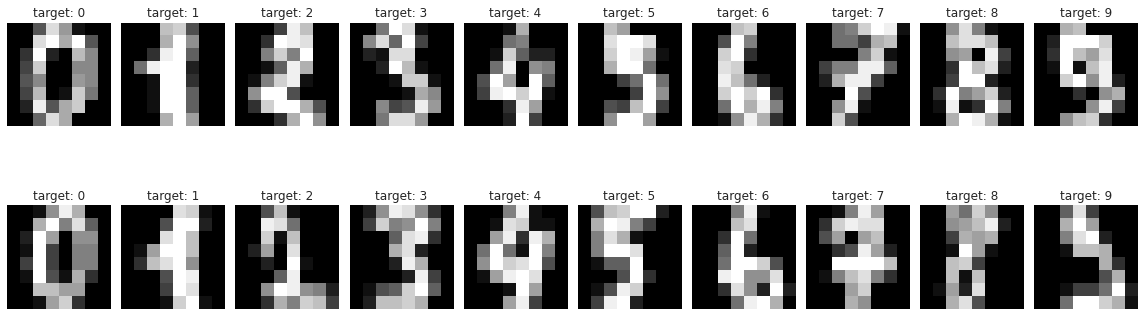

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

Так выглядят исходные изображения. Наша задача - свести их к двумерному пространству, не потеряв при этом кластерную структуру.

In [ ]:
X = mnist.data
X.shape

(1797, 64)

In [ ]:
y = mnist.target
y

array([0, 1, 2, ..., 8, 9, 8])

Предварительно отнормируем данные.

In [ ]:
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(1797, 64)


Зададим t-SNE с соответствующими аргументами и визуализируем результат.

In [ ]:
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


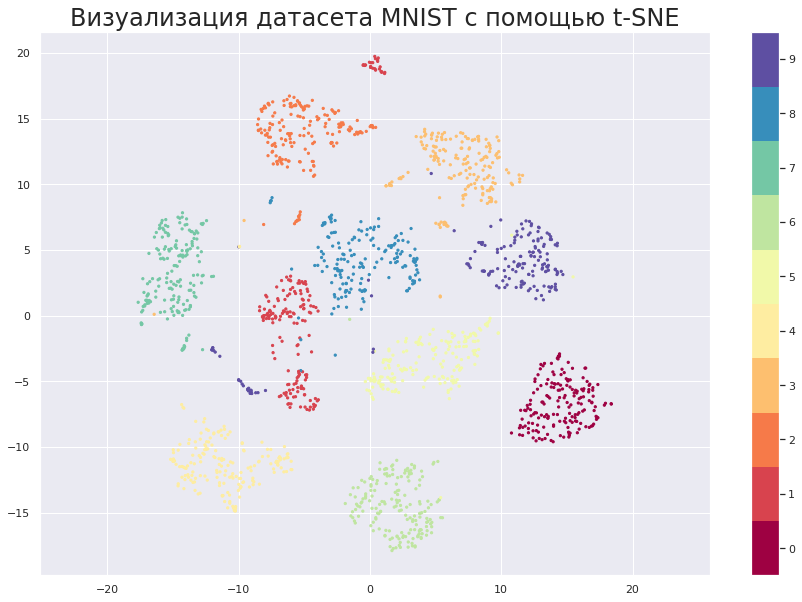

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Визуализация датасета MNIST с помощью t-SNE', fontsize=24);

В действительности существует очень много способов снижения размерности данных. Многие из этих методов основаны на применении нейронных сетей. Предложенные в этой лекции методы представляют из себя довольно эффективные и вместе с тем простые классические алгоритмы решения задачи снижения размерности.

Отдельный сложный вопрос - как выбрать размерность нового признакового пространства, чтобы потерять при переходе не слишком много информации. Этот вопрос на текущий момент находится на переднем крае науки.